# Data Preprocessing

In [1]:
# import required libraries

import pandas as pd
import re
import string
import nltk
from nltk.corpus import stopwords
import emoji
import warnings
warnings = warnings.filterwarnings("ignore")
from nltk.stem import WordNetLemmatizer
from transformers import pipeline, AutoTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
# Download stopwords and wordnet

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nvish\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\nvish\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
!pip install transformers

In [3]:
# loading tweets

data = pd.read_csv(r"C:\Users\nvish\Downloads\IndianElection19TwitterData.csv")
data

,Unnamed: 0,Date,User,Tweet
0,0,2019-05-18 23:50:47+00:00,advosushildixit,@anjanaomkashyap I am seeing you as future #bj...
1,1,2019-05-18 23:20:00+00:00,airnewsalerts,Trinamool Congress Sitting MP Abhishek Banerje...
2,2,2019-05-18 23:00:03+00:00,jiaeur,#LokSabhaElections2019 \n23rd May 2019 will re...
3,3,2019-05-18 22:53:54+00:00,PVenkatGandhi,#LokSabhaElections2019 \n23rd May 2019 will re...
4,4,2019-05-18 22:20:48+00:00,TheNirbhay1,PM Modi creates a new record of being the only...
...,...,...,...,...
142561,142561,2019-03-06 10:18:02+00:00,RAMANKAIRA,@mayankgandhi04 @mallesh_2004 Early morning #p...
142562,142562,2019-03-06 10:11:43+00:00,RAMANKAIRA,@DrKumarVishwas Early morning #political move ...
142563,142563,2019-01-24 12:57:48+00:00,thota_J,CVoter predicts seat share for upcoming #LokSa...
142564,142564,2019-01-24 12:48:37+00:00,thota_J,CVoter predicts seat share for upcoming #LokSa...


In [4]:
# dropping unwanted columns

data.drop(columns=["Unnamed: 0", "Date","User"], inplace=True)
data

,Tweet
0,@anjanaomkashyap I am seeing you as future #bj...
1,Trinamool Congress Sitting MP Abhishek Banerje...
2,#LokSabhaElections2019 \n23rd May 2019 will re...
3,#LokSabhaElections2019 \n23rd May 2019 will re...
4,PM Modi creates a new record of being the only...
...,...
142561,@mayankgandhi04 @mallesh_2004 Early morning #p...
142562,@DrKumarVishwas Early morning #political move ...
142563,CVoter predicts seat share for upcoming #LokSa...
142564,CVoter predicts seat share for upcoming #LokSa...


In [5]:
# Size of dataset

data.shape

(142566, 1)

In [6]:
data.dtypes

Tweet    object
dtype: object

In [7]:
data.isna().sum()

Tweet    0
dtype: int64

In [8]:
# Define a function for cleaning the tweets

lemmatizer = WordNetLemmatizer()

def clean_tweet(text):
    # 1. To remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # 2. To remove mentioned usernames
    text = re.sub(r'@\w+', '', text)
    # 3. To remove hashtags 
    text = re.sub(r'#(\w+)', r'\1', text)
    # 4. To remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # 5. To remove numbers
    text = re.sub(r'\d+', '', text)
    # 6. To remove emojis
    text = emoji.demojize(text)
    # 7. Convert the text into lowercase
    text = text.lower()
    # 8. To remove stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join(word for word in text.split() if word not in stop_words)
    # 9. Lemmatization
    text = ' '.join(lemmatizer.lemmatize(word) for word in text.split())
    return text

# Apply the cleaning function to the tweets
data['cleaned_tweet'] = data['Tweet'].apply(clean_tweet)
data

,Tweet,cleaned_tweet
0,@anjanaomkashyap I am seeing you as future #bj...,seeing future bjp spokesperson good luck anjan...
1,Trinamool Congress Sitting MP Abhishek Banerje...,trinamool congress sitting mp abhishek banerje...
2,#LokSabhaElections2019 \n23rd May 2019 will re...,loksabhaelections rd may reveal even ecisveep ...
3,#LokSabhaElections2019 \n23rd May 2019 will re...,loksabhaelections rd may reveal even could hel...
4,PM Modi creates a new record of being the only...,pm modi creates new record pm democratic count...
...,...,...
142561,@mayankgandhi04 @mallesh_2004 Early morning #p...,early morning political move detailed discussi...
142562,@DrKumarVishwas Early morning #political move ...,early morning political move detailed discussi...
142563,CVoter predicts seat share for upcoming #LokSa...,cvoter predicts seat share upcoming loksabhael...
142564,CVoter predicts seat share for upcoming #LokSa...,cvoter predicts seat share upcoming loksabhael...


In [9]:
# dropping the uncleaned tweet column

data.drop(columns='Tweet',inplace=True)
data

,cleaned_tweet
0,seeing future bjp spokesperson good luck anjan...
1,trinamool congress sitting mp abhishek banerje...
2,loksabhaelections rd may reveal even ecisveep ...
3,loksabhaelections rd may reveal even could hel...
4,pm modi creates new record pm democratic count...
...,...
142561,early morning political move detailed discussi...
142562,early morning political move detailed discussi...
142563,cvoter predicts seat share upcoming loksabhael...
142564,cvoter predicts seat share upcoming loksabhael...


In [10]:
# rename the column name for better understanding

data = data.rename(columns={'cleaned_tweet':'Tweets'})
data

,Tweets
0,seeing future bjp spokesperson good luck anjan...
1,trinamool congress sitting mp abhishek banerje...
2,loksabhaelections rd may reveal even ecisveep ...
3,loksabhaelections rd may reveal even could hel...
4,pm modi creates new record pm democratic count...
...,...
142561,early morning political move detailed discussi...
142562,early morning political move detailed discussi...
142563,cvoter predicts seat share upcoming loksabhael...
142564,cvoter predicts seat share upcoming loksabhael...


In [11]:
data.duplicated().sum()

3450

In [12]:
# drop duplicate values

data = data.drop_duplicates()
data

,Tweets
0,seeing future bjp spokesperson good luck anjan...
1,trinamool congress sitting mp abhishek banerje...
2,loksabhaelections rd may reveal even ecisveep ...
3,loksabhaelections rd may reveal even could hel...
4,pm modi creates new record pm democratic count...
...,...
142558,electioncommission loksabhaelections phase one...
142560,early morning political move detailed discussi...
142563,cvoter predicts seat share upcoming loksabhael...
142564,cvoter predicts seat share upcoming loksabhael...


In [13]:
data.reset_index(drop=True, inplace=True)
data

,Tweets
0,seeing future bjp spokesperson good luck anjan...
1,trinamool congress sitting mp abhishek banerje...
2,loksabhaelections rd may reveal even ecisveep ...
3,loksabhaelections rd may reveal even could hel...
4,pm modi creates new record pm democratic count...
...,...
139111,electioncommission loksabhaelections phase one...
139112,early morning political move detailed discussi...
139113,cvoter predicts seat share upcoming loksabhael...
139114,cvoter predicts seat share upcoming loksabhael...


In [14]:
sentiment_analyzer = pipeline('sentiment-analysis')

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [15]:
# Tokenizer initialization for checking token length
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

In [16]:
# Apply the count_tokens function to the 'Tweets' column
data['Token_Count'] = data['Tweets'].apply(lambda x: len(tokenizer.tokenize(x)))

Token indices sequence length is longer than the specified maximum sequence length for this model (678 > 512). Running this sequence through the model will result in indexing errors


In [17]:
data['Tweets_Truncated'] = data['Tweets'].apply(
    lambda x: tokenizer.decode(tokenizer.encode(x, max_length=512, truncation=True)))

In [18]:
data['Sentiment'] = data['Tweets_Truncated'].apply(
    lambda x: sentiment_analyzer(x, truncation=True, padding=True)[0]['label'])

In [19]:
data

,Tweets,Token_Count,Tweets_Truncated,Sentiment
0,seeing future bjp spokesperson good luck anjan...,31,[CLS] seeing future bjp spokesperson good luck...,POSITIVE
1,trinamool congress sitting mp abhishek banerje...,43,[CLS] trinamool congress sitting mp abhishek b...,NEGATIVE
2,loksabhaelections rd may reveal even ecisveep ...,42,[CLS] loksabhaelections rd may reveal even eci...,NEGATIVE
3,loksabhaelections rd may reveal even could hel...,38,[CLS] loksabhaelections rd may reveal even cou...,NEGATIVE
4,pm modi creates new record pm democratic count...,66,[CLS] pm modi creates new record pm democratic...,POSITIVE
...,...,...,...,...
139111,electioncommission loksabhaelections phase one...,32,[CLS] electioncommission loksabhaelections pha...,NEGATIVE
139112,early morning political move detailed discussi...,29,[CLS] early morning political move detailed di...,POSITIVE
139113,cvoter predicts seat share upcoming loksabhael...,19,[CLS] cvoter predicts seat share upcoming loks...,NEGATIVE
139114,cvoter predicts seat share upcoming loksabhael...,26,[CLS] cvoter predicts seat share upcoming loks...,NEGATIVE


In [20]:
data['Sentiment'].value_counts()

Sentiment
NEGATIVE    106681
POSITIVE     32435
Name: count, dtype: int64

In [21]:
bjp_keywords = ['modi', 'narendra modi', 'narendra', 'bjp', 'amit shah', 'namo', 'bharatiya janata party', 'narendramodi', 'amitshah', 'bharatiyajanataparty']
inc_keywords = ['rahul', 'gandhi', 'rahul gandhi', 'rahulgandhi', 'rg', 'indiannationalcongress', 'inc', 'congress', 'sonia gandhi', 'priyanka gandhi', 'soniagandhi', 'priyankagandhi', 'rajeevgandhi']

In [22]:
def classify_candidate(text):
    text = text.lower()  # Convert to lowercase for consistent keyword matching
    if any(keyword in text for keyword in bjp_keywords):
        return 'BJP'
    elif any(keyword in text for keyword in inc_keywords):
        return 'INC'
    else:
        return 'Unknown'

# Apply the classification to the dataset
data['Political_party'] = data['Tweets_Truncated'].apply(classify_candidate)

In [23]:
data

,Tweets,Token_Count,Tweets_Truncated,Sentiment,Political_party
0,seeing future bjp spokesperson good luck anjan...,31,[CLS] seeing future bjp spokesperson good luck...,POSITIVE,BJP
1,trinamool congress sitting mp abhishek banerje...,43,[CLS] trinamool congress sitting mp abhishek b...,NEGATIVE,BJP
2,loksabhaelections rd may reveal even ecisveep ...,42,[CLS] loksabhaelections rd may reveal even eci...,NEGATIVE,BJP
3,loksabhaelections rd may reveal even could hel...,38,[CLS] loksabhaelections rd may reveal even cou...,NEGATIVE,BJP
4,pm modi creates new record pm democratic count...,66,[CLS] pm modi creates new record pm democratic...,POSITIVE,BJP
...,...,...,...,...,...
139111,electioncommission loksabhaelections phase one...,32,[CLS] electioncommission loksabhaelections pha...,NEGATIVE,Unknown
139112,early morning political move detailed discussi...,29,[CLS] early morning political move detailed di...,POSITIVE,Unknown
139113,cvoter predicts seat share upcoming loksabhael...,19,[CLS] cvoter predicts seat share upcoming loks...,NEGATIVE,Unknown
139114,cvoter predicts seat share upcoming loksabhael...,26,[CLS] cvoter predicts seat share upcoming loks...,NEGATIVE,Unknown


In [24]:
data['Political_party'].value_counts()

Political_party
BJP        83241
Unknown    32440
INC        23435
Name: count, dtype: int64

In [25]:
#  Data Aggregation: Count positive and negative sentiments for each party
support_summary = data.groupby('Political_party')['Sentiment'].value_counts().unstack().fillna(0)

In [26]:
print(support_summary.columns)

Index(['NEGATIVE', 'POSITIVE'], dtype='object', name='Sentiment')


In [27]:
# Calculate totals and percentages
support_summary['Total'] = support_summary.sum(axis=1)
support_summary['Positive Percentage'] = (support_summary['POSITIVE'] / support_summary['Total']) * 100
support_summary['Negative Percentage'] = (support_summary['NEGATIVE'] / support_summary['Total']) * 100

# Display support summary
support_summary

Sentiment,NEGATIVE,POSITIVE,Total,Positive Percentage,Negative Percentage
Political_party,,,,,
BJP,64171,19070,83241,22.909384,77.090616
INC,16895,6540,23435,27.906977,72.093023
Unknown,25615,6825,32440,21.038841,78.961159


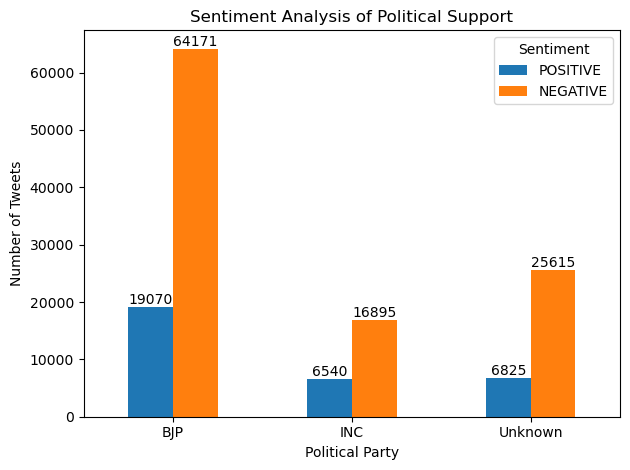

In [28]:
# 3. Visualization: Bar chart for sentiment analysis
import matplotlib.pyplot as plt

# Visualization: Bar chart for sentiment analysis

ax = support_summary[['POSITIVE', 'NEGATIVE']].plot(kind='bar')

# Adding values on top of the bars with adjusted position
for p in ax.patches:
    height = p.get_height()
    # Position the value slightly above the bar (or below if height is very small)
    ax.annotate(f'{int(height)}', 
                (p.get_x() + p.get_width() / 2, 
                 height + 1),  # Add 1 to position it above the bar
                ha='center', va='bottom', 
                fontsize=10)

plt.title('Sentiment Analysis of Political Support')
plt.xlabel('Political Party')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=0)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

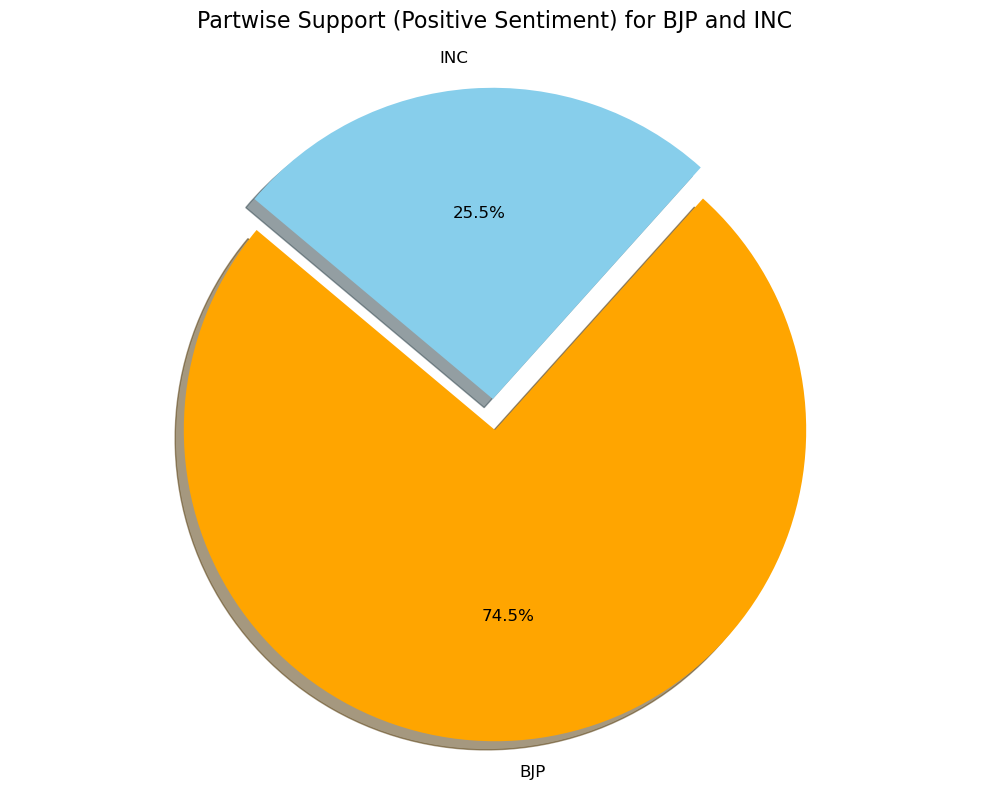

In [29]:
import matplotlib.pyplot as plt

# Filter the data for positive sentiments
positive_data = data[data['Sentiment'] == 'POSITIVE']

# Count the number of positive tweets for each political party, considering only BJP and INC
partwise_support = positive_data[positive_data['Political_party'].isin(['BJP', 'INC'])]['Political_party'].value_counts()

# Colors: Orange for BJP, Sky Blue for INC
colors = ['orange', '#87CEEB']  # Sky Blue

# Exploding the INC slice slightly
explode = (0, 0.1)  # Only "explode" the 2nd slice (INC)

# Create the pie chart
plt.figure(figsize=(10, 8))
plt.pie(partwise_support, 
        labels=partwise_support.index, 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=colors, 
        explode=explode, 
        shadow=True, 
        textprops=dict(color="black", fontsize=12))

# Adjust the title position
plt.title('Partwise Support (Positive Sentiment) for BJP and INC', fontsize=16, pad=20)  # Added padding

plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.tight_layout()  # Adjusts the layout
plt.show()


In [30]:
data['Tweets_Truncated'] = data['Tweets_Truncated'].str.replace(r'\[CLS\]\s*', '', regex=True)

print("Removed [CLS] token from the truncated tweets.")

Removed [CLS] token from the truncated tweets.


In [31]:
data

,Tweets,Token_Count,Tweets_Truncated,Sentiment,Political_party
0,seeing future bjp spokesperson good luck anjan...,31,seeing future bjp spokesperson good luck anjan...,POSITIVE,BJP
1,trinamool congress sitting mp abhishek banerje...,43,trinamool congress sitting mp abhishek banerje...,NEGATIVE,BJP
2,loksabhaelections rd may reveal even ecisveep ...,42,loksabhaelections rd may reveal even ecisveep ...,NEGATIVE,BJP
3,loksabhaelections rd may reveal even could hel...,38,loksabhaelections rd may reveal even could hel...,NEGATIVE,BJP
4,pm modi creates new record pm democratic count...,66,pm modi creates new record pm democratic count...,POSITIVE,BJP
...,...,...,...,...,...
139111,electioncommission loksabhaelections phase one...,32,electioncommission loksabhaelections phase one...,NEGATIVE,Unknown
139112,early morning political move detailed discussi...,29,early morning political move detailed discussi...,POSITIVE,Unknown
139113,cvoter predicts seat share upcoming loksabhael...,19,cvoter predicts seat share upcoming loksabhael...,NEGATIVE,Unknown
139114,cvoter predicts seat share upcoming loksabhael...,26,cvoter predicts seat share upcoming loksabhael...,NEGATIVE,Unknown


In [32]:
# dropping unwanted columns

data.drop(columns=["Tweets", "Token_Count"], inplace=True)
data

,Tweets_Truncated,Sentiment,Political_party
0,seeing future bjp spokesperson good luck anjan...,POSITIVE,BJP
1,trinamool congress sitting mp abhishek banerje...,NEGATIVE,BJP
2,loksabhaelections rd may reveal even ecisveep ...,NEGATIVE,BJP
3,loksabhaelections rd may reveal even could hel...,NEGATIVE,BJP
4,pm modi creates new record pm democratic count...,POSITIVE,BJP
...,...,...,...
139111,electioncommission loksabhaelections phase one...,NEGATIVE,Unknown
139112,early morning political move detailed discussi...,POSITIVE,Unknown
139113,cvoter predicts seat share upcoming loksabhael...,NEGATIVE,Unknown
139114,cvoter predicts seat share upcoming loksabhael...,NEGATIVE,Unknown


In [33]:
data = data.rename(columns={'Tweets_Truncated':'Tweets'})
data

,Tweets,Sentiment,Political_party
0,seeing future bjp spokesperson good luck anjan...,POSITIVE,BJP
1,trinamool congress sitting mp abhishek banerje...,NEGATIVE,BJP
2,loksabhaelections rd may reveal even ecisveep ...,NEGATIVE,BJP
3,loksabhaelections rd may reveal even could hel...,NEGATIVE,BJP
4,pm modi creates new record pm democratic count...,POSITIVE,BJP
...,...,...,...
139111,electioncommission loksabhaelections phase one...,NEGATIVE,Unknown
139112,early morning political move detailed discussi...,POSITIVE,Unknown
139113,cvoter predicts seat share upcoming loksabhael...,NEGATIVE,Unknown
139114,cvoter predicts seat share upcoming loksabhael...,NEGATIVE,Unknown


In [34]:
data['Political_party'].value_counts()

Political_party
BJP        83241
Unknown    32440
INC        23435
Name: count, dtype: int64

In [35]:
data.to_csv("cleaned_tweets.csv", index=False)
print("Cleaned data has been successfully exported to 'cleaned_tweets.csv'.")